In [1]:
import tweepy
import webbrowser
import time
import pandas as pd
import numpy as np
import datetime as dt
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords


##Resources: https://www.youtube.com/watch?v=ujId4ipkBio&ab_channel=ComputerScience , https://www.youtube.com/watch?v=MpIi4HtCiVk&t=204s&ab_channel=AlexTheAnalyst 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Xerd-R\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Xerd-R\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import spacy
import spacy.cli
spacy.cli.download("en_core_web_lg")
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [3]:
consumer_key = "???"
consumer_secret = "???"
callback_uri = 'oob'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
webbrowser.open(redirect_url)

True

In [4]:
user_pin_input = input("What's the pin value? ")
auth.get_access_token(user_pin_input)

What's the pin value? 1974728


('327729819-fErh31aex1gR7WjvRrtuzYAbV5GIpr93Ryxv5akM',
 'FjocgOIFxn4ikFcSPsDVPyGWkkAkpOV6sKYYaEQ9TOxnb')

In [5]:
api = tweepy.API(auth)
## api = tweepy.API(authenticate, wait_on_rate_limit = True) (Source: https://www.youtube.com/watch?v=ujId4ipkBio&ab_channel=ComputerScience)

In [6]:
me = api.me()
me.screen_name

'SerdarSelimYS'

In [ ]:
dir(api)

In [27]:
posts = api.user_timeline(screen_name ="Refugees", count= 500, lang = "en", tweet_mode="extended")

print("Show the last 25 recent tweets: \n")
for tweet in posts[0:500]:
    print(tweet.created_at,tweet.id,tweet.user.name,tweet.full_text + '\n')

Show the last 25 recent tweets: 

2021-06-27 11:12:01 1409107243295985669 UNHCR, the UN Refugee Agency 👨‍⚕️ During the pandemic refugee doctors, nurses, health-care technicians and volunteers have helped fight COVID-19. 

Now we need vaccines for everyone. 💉 https://t.co/nt9exstaDV

2021-06-27 10:44:03 1409100206608728066 UNHCR, the UN Refugee Agency COVID-19 doesn’t stop periods.

COVID-19 also hasn’t stopped emergencies. 

No refugee should be deprived of period products, sanitation infrastructure or basic support to manage menstruation safely, comfortably and with dignity. https://t.co/2JHb4MIIiq

2021-06-27 10:30:00 1409096669010882567 UNHCR, the UN Refugee Agency Like the great Camoruco tree, Dayana is home in Panama at last. https://t.co/NvcYf1SZOH

2021-06-27 09:13:00 1409077291506929678 UNHCR, the UN Refugee Agency “I want a better life for all of us.”

For refugee students like Haskins, Linda and Xolile, the opportunity to go to university is opening doors to a more secure fut

In [28]:
df = pd.DataFrame( [tweet.full_text for tweet in posts] , columns=['Tweets'])
df.tail()

,Tweets
195,RT @sportbible: From refugee fleeing war in Bo...
196,Did you play a sport in school?\n\nThe teamwor...
197,RT @MayorofLondon: This #WorldRefugeeDay I wa...
198,"He ran to school.\nHe ran for his life.\nThen,..."
199,RT @atomaraullo: The pandemic stopped life as ...


In [29]:
def cleanTxt(text):
    text = re.sub(r'@[A-za-z0-9]+','', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text
                  
df['Tweets']= df['Tweets'].apply(cleanTxt)
df.head()

,Tweets
0,"👨‍⚕️ During the pandemic refugee doctors, nurs..."
1,COVID-19 doesn’t stop periods.\n\nCOVID-19 als...
2,"Like the great Camoruco tree, Dayana is home i..."
3,“I want a better life for all of us.”\n\nFor r...
4,UNHCR is proud to support LGBTIQ+ rights \n\nE...


In [30]:
df2 = df['Tweets']
print(df2)

0      👨‍⚕️ During the pandemic refugee doctors, nurs...
1      COVID-19 doesn’t stop periods.\n\nCOVID-19 als...
2      Like the great Camoruco tree, Dayana is home i...
3      “I want a better life for all of us.”\n\nFor r...
4      UNHCR is proud to support LGBTIQ+ rights \n\nE...
                             ...                        
195    : From refugee fleeing war in Bosnia to winnin...
196    Did you play a sport in school?\n\nThe teamwor...
197    : This WorldRefugeeDay  I want to extend my he...
198    He ran to school.\nHe ran for his life.\nThen,...
199    : The pandemic stopped life as we know but it ...
Name: Tweets, Length: 200, dtype: object


In [31]:
#This splits all the sentences up which makes it easier for us to work with

all_sentences = []

for word in df2:
    all_sentences.append(word)
    
all_sentences

##df1 = df.to_string()
#df.split = df1.split()

lines = list()
for line in all_sentences:
    words = line.split()
    for w in words:
        lines.append(w)
        
print(lines)

['👨\u200d⚕️', 'During', 'the', 'pandemic', 'refugee', 'doctors,', 'nurses,', 'health-care', 'technicians', 'and', 'volunteers', 'have', 'helped', 'fight', 'COVID-19.', 'Now', 'we', 'need', 'vaccines', 'for', 'everyone.', '💉', 'COVID-19', 'doesn’t', 'stop', 'periods.', 'COVID-19', 'also', 'hasn’t', 'stopped', 'emergencies.', 'No', 'refugee', 'should', 'be', 'deprived', 'of', 'period', 'products,', 'sanitation', 'infrastructure', 'or', 'basic', 'support', 'to', 'manage', 'menstruation', 'safely,', 'comfortably', 'and', 'with', 'dignity.', 'Like', 'the', 'great', 'Camoruco', 'tree,', 'Dayana', 'is', 'home', 'in', 'Panama', 'at', 'last.', '“I', 'want', 'a', 'better', 'life', 'for', 'all', 'of', 'us.”', 'For', 'refugee', 'students', 'like', 'Haskins,', 'Linda', 'and', 'Xolile,', 'the', 'opportunity', 'to', 'go', 'to', 'university', 'is', 'opening', 'doors', 'to', 'a', 'more', 'secure', 'future', 'in', 'Botswana.', 'EducationForAll', 'UNHCR', 'is', 'proud', 'to', 'support', 'LGBTIQ+', 'right

In [32]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [33]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['dure',
 'the',
 'pandem',
 'refuge',
 'doctor',
 'nurs',
 'healthcar',
 'technician',
 'and',
 'volunt',
 'have',
 'help',
 'fight',
 'covid19',
 'now',
 'we',
 'need',
 'vaccin',
 'for',
 'everyon',
 'covid19',
 'doesnt',
 'stop',
 'period',
 'covid19',
 'also',
 'hasnt',
 'stop',
 'emerg',
 'no',
 'refuge',
 'should',
 'be',
 'depriv',
 'of',
 'period',
 'product',
 'sanit',
 'infrastructur',
 'or',
 'basic',
 'support',
 'to',
 'manag',
 'menstruat',
 'safe',
 'comfort',
 'and',
 'with',
 'digniti',
 'like',
 'the',
 'great',
 'camoruco',
 'tree',
 'dayana',
 'is',
 'home',
 'in',
 'panama',
 'at',
 'last',
 'i',
 'want',
 'a',
 'better',
 'life',
 'for',
 'all',
 'of',
 'us',
 'for',
 'refuge',
 'student',
 'like',
 'haskin',
 'linda',
 'and',
 'xolil',
 'the',
 'opportun',
 'to',
 'go',
 'to',
 'univers',
 'is',
 'open',
 'door',
 'to',
 'a',
 'more',
 'secur',
 'futur',
 'in',
 'botswana',
 'educationforal',
 'unhcr',
 'is',
 'proud',
 'to',
 'support',
 'lgbtiq',
 'right',
 'e

In [34]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['dure',
 'pandem',
 'refuge',
 'doctor',
 'nurs',
 'healthcar',
 'technician',
 'volunt',
 'help',
 'fight',
 'covid19',
 'need',
 'vaccin',
 'everyon',
 'covid19',
 'doesnt',
 'stop',
 'period',
 'covid19',
 'hasnt',
 'stop',
 'emerg',
 'refuge',
 'depriv',
 'period',
 'product',
 'sanit',
 'infrastructur',
 'basic',
 'support',
 'manag',
 'menstruat',
 'safe',
 'comfort',
 'digniti',
 'like',
 'great',
 'camoruco',
 'tree',
 'dayana',
 'home',
 'panama',
 'want',
 'better',
 'life',
 'refuge',
 'student',
 'like',
 'haskin',
 'linda',
 'xolil',
 'opportun',
 'univers',
 'open',
 'door',
 'secur',
 'futur',
 'botswana',
 'educationforal',
 'unhcr',
 'proud',
 'support',
 'lgbtiq',
 'right',
 'everi',
 'lgbtiq',
 'person',
 'abl',
 'live',
 'peac',
 'safe',
 'countri',
 'flee',
 'crisi',
 'syria',
 'fli',
 'high',
 'achiev',
 'dream',
 'becom',
 'firstev',
 'femal',
 'syrian',
 'refuge',
 'pilot',
 'covid19',
 'brought',
 'world',
 'standstil',
 'didnt',
 'stop',
 'war',
 'conflict',


In [35]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [36]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 418, 2: 158, 3: 73, 4: 46, 6: 26, 5: 26, 9: 10, 8: 7, 13: 6, 10: 6, ...})

In [37]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Xerd-R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


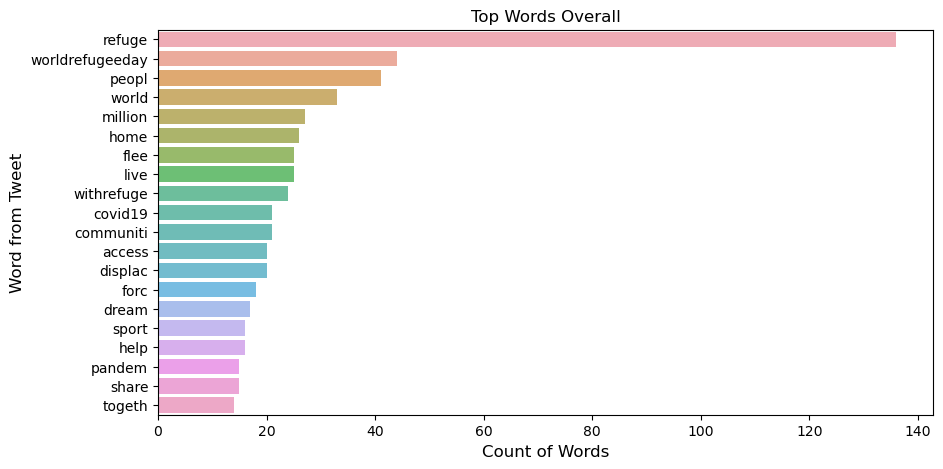

In [38]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [21]:
import spacy.cli
spacy.cli.download("en_core_web_sm")
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [39]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [40]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()

C:\Users\Xerd-R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


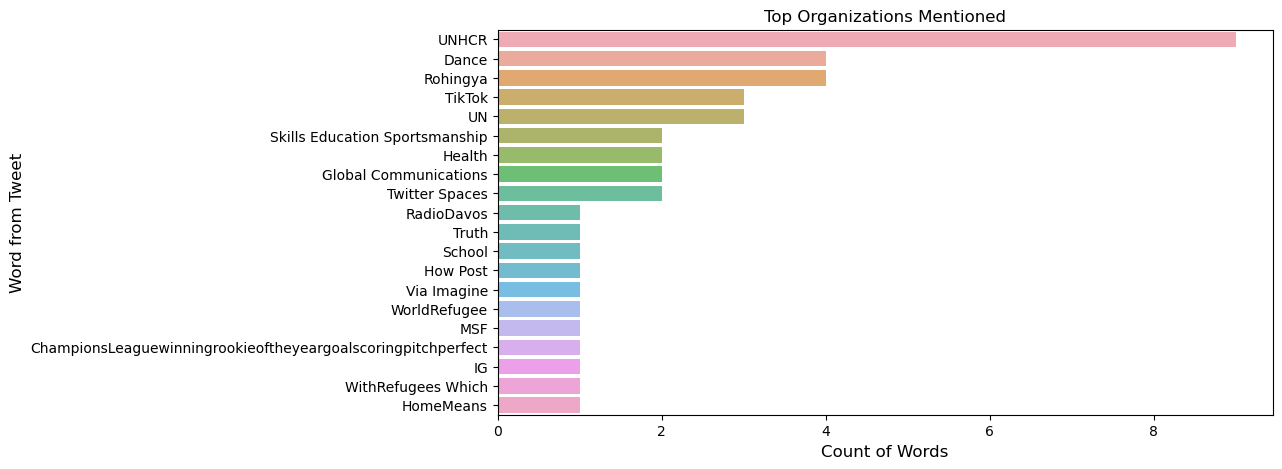

In [41]:
df = df7[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [42]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

C:\Users\Xerd-R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


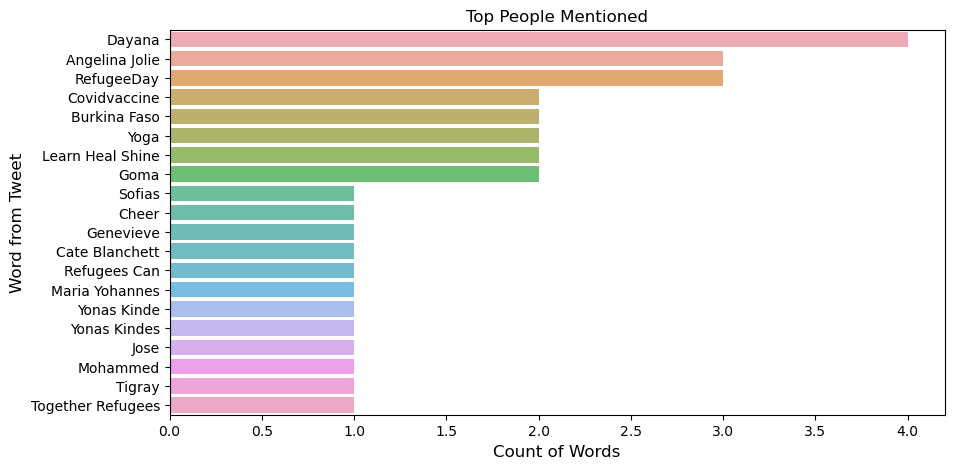

In [43]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()